# Exercise 2 - Sextortion Analysis

In this demo we will investigate Bitcoin addresses that received money from Sextortion spam victims and are therefore, most likely, controlled by the perpetrator or some in-between money laundry network. 

The data from this demo is taken from our study [Spams meet Cryptocurrencies: Sextortion in the Bitcoin Ecosystem](https://arxiv.org/abs/1908.01051) and is a subset of [all the 12,533 Bitcoin addresses](https://github.com/MatteoRomiti/Sextortion_Spam_Bitcoin) we have collected from 4,340,736 sextortion spam emails.

The data for this demo is available at `https://raw.githubusercontent.com/iknaio/iknaio-api-tutorial/main/data/sextortion_addresses.csv`

We are going to answer the following questions:

* Q1: How many USD did the input addresses receive in total?

* Q2: To how many entities can we map these addresses?

* Q3: How many addresses are controlled by these entities?

* Q4: How many USD did the corresponding entities receive in total?

* Q5: Where did the money come from, and where did it go to?

## Preparations

First, we install the graphsense-python package and define an API-key. An API-key for the [GraphSense](https://graphsense.github.io/) instance hosted by [Iknaio](https://www.ikna.io/) can be requested by sending an email to [contact@iknaio.com](contact@iknaio.com).

In [1]:
!pip install git+https://github.com/graphsense/graphsense-python.git

import graphsense
from graphsense.api import bulk_api, general_api

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/graphsense/graphsense-python.git to /tmp/pip-req-build-ki5df6nn
  Running command git clone --filter=blob:none --quiet https://github.com/graphsense/graphsense-python.git /tmp/pip-req-build-ki5df6nn
  Resolved https://github.com/graphsense/graphsense-python.git to commit 88fcdb52d9579f66b1422a7ff8367a52d75fe4b8
  Preparing metadata (setup.py) ... done
  Created wheel for graphsense-python: filename=graphsense_python-23.3-py3-none-any.whl size=197895 sha256=d77326385dbbdc9cb535c03f57b166bb3ca8c25a1e44e15f2aa5007bd1cca31d
  Stored in directory: /tmp/pip-ephem-wheel-cache-kb4eclbz/wheels/73/7b/8f/68a9d22a64bf4439c9af8a7a0a6815574e6288b1c6dfaf392d
Successfully built graphsense-python


In [3]:
configuration = graphsense.Configuration(
    host = "https://api.ikna.io/",
    api_key = {
        'api_key': ""
    }
)

GraphSense supports Bitcoin-like UTXO and Ethereum-like Account-Model ledgers. Iknaio currently hosts BTC, LTC, BCH, ZEC, and ETH.

We are investigating Bitcoin transactions, therefore we set the default currency to Bitcoin **BTC**.

In [4]:
CURRENCY = 'btc'

We can test whether or client works, by checking what data the GraphSense endpoint provides

In [ ]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = general_api.GeneralApi(api_client)
    api_response = api_instance.get_statistics()
    display(api_response)

Now we load the provided sample Bitcoin addresses


In [7]:
addressDF = pd.read_csv(
    'https://raw.githubusercontent.com/iknaio/iknaio-api-tutorial/main/data/sextortion_addresses.csv',
    header=None,
    names=["address"]
)
addressDF

,address
0,1JwRp2J8bQcoG8XTUbxQZaEj9QB4RB6zEa
1,1EZS92K4xJbymDLwG4F7PNF5idPE62e9XY
2,16B4HuSAJ4WRdCq7dzA5b4ASh6QQ7ytZWB
3,1EdX5vtBiHGmkqbJc7VRSuVMx9Kpgh53Tp
4,3Ch7RPfwkJ3wHhiBfA4CNc8SagGdjbZwVs
...,...
240,1BC1pvPUQF9QHg73ha4AEAhaoEvg6HmTbS
241,13QKq8RsvbJnLRbi5ZcVX1ziYW83tqvp1q
242,1DiEqE5R1Ktu7QCLUuJN31PNtpoBU41x2E
243,1NWybUp8ZJXKyDg2DR5MaePspforMPYbM3


# Q1. How many USD (US dollars) did the input addresses receive in total?

Instead of querying each address individually, we just pass the dataframe of known sextortion payment addresses.

In [10]:
with graphsense.ApiClient(configuration) as clnt:
    blkapi = bulk_api.BulkApi(clnt)

    # documentation about available bulk operations can be found
    # here https://api.ikna.io/#/bulk/bulk_csv
    rcsv = blkapi.bulk_csv(
                CURRENCY,
                operation="get_address",
                body={
                    'address': addressDF['address'].to_list()
                },
                num_pages=1,
                _preload_content=False
              )
    respAddrDF = pd.read_csv(rcsv)
respAddrDF.head(10)

,_error,_info,_request_address,actors,address,balance_eur,balance_usd,balance_value,currency,entity,...,status,token_balances,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value,total_tokens_received,total_tokens_spent
0,NaN,NaN,1CnQxRTP5WeGmwaSriYdefDEHyjWpY7tjw,NaN,1CnQxRTP5WeGmwaSriYdefDEHyjWpY7tjw,0.0,0.0,0,btc,465259323,...,clean,NaN,772.30,879.98,22836576,798.33,913.22,22836576,NaN,NaN
1,NaN,NaN,1e8o68StxCFLr6wdwKBrBqMQZc1VbFVMk,NaN,1e8o68StxCFLr6wdwKBrBqMQZc1VbFVMk,0.0,0.0,0,btc,463565677,...,clean,NaN,909.67,1042.00,26111818,909.67,1041.99,26111818,NaN,NaN
2,NaN,NaN,3P5yeiyWLciKi28yY22LdRntJucSuedTq4,NaN,3P5yeiyWLciKi28yY22LdRntJucSuedTq4,0.0,0.0,0,btc,447648902,...,clean,NaN,1295.29,1471.72,32580637,1301.35,1481.80,32580637,NaN,NaN
3,NaN,NaN,139XY4ZjWYqHMJvGCySuzXq7o6tGccKKrJ,NaN,139XY4ZjWYqHMJvGCySuzXq7o6tGccKKrJ,0.0,0.0,0,btc,430255405,...,clean,NaN,957.29,1119.91,17136703,973.32,1123.50,17136703,NaN,NaN
4,NaN,NaN,144CDUeBhcwoEUmA2B1cL5p5PqZrhJWCCt,NaN,144CDUeBhcwoEUmA2B1cL5p5PqZrhJWCCt,0.0,0.0,0,btc,430255405,...,clean,NaN,12783.10,15034.87,224736076,12320.83,14497.81,224736076,NaN,NaN
5,NaN,NaN,1KzMDhZLokkNd1kcxs2mgwXm97pVvnfRBC,NaN,1KzMDhZLokkNd1kcxs2mgwXm97pVvnfRBC,0.0,0.0,0,btc,457139754,...,clean,NaN,1397.69,1592.33,46119982,1370.09,1557.93,46119982,NaN,NaN
6,NaN,NaN,1G1qFoadiDxa7zTvppSMJhJi63tNUL3cy7,NaN,1G1qFoadiDxa7zTvppSMJhJi63tNUL3cy7,0.0,0.0,0,btc,466309837,...,clean,NaN,21510.51,24663.00,629828949,20312.97,23286.84,629828949,NaN,NaN
7,NaN,NaN,3714n9rV3ijxRLe9Gu5UhXtizosnmLwTdn,NaN,3714n9rV3ijxRLe9Gu5UhXtizosnmLwTdn,0.0,0.0,0,btc,457504716,...,clean,NaN,911.44,1034.95,29691741,973.15,1111.04,29691741,NaN,NaN
8,NaN,NaN,1GGhxKFqxvgdB6Qnqx9xhY9ZkpwMJ6mkR1,NaN,1GGhxKFqxvgdB6Qnqx9xhY9ZkpwMJ6mkR1,0.0,0.0,0,btc,446281042,...,clean,NaN,711.05,816.78,12507839,624.90,706.45,12507839,NaN,NaN
9,NaN,NaN,1FG7huiM8Jq8JdpULfvVDCHThZqVeKB96q,NaN,1FG7huiM8Jq8JdpULfvVDCHThZqVeKB96q,0.0,0.0,0,btc,421412157,...,clean,NaN,349.91,409.00,6249697,348.50,407.37,6249697,NaN,NaN


In [11]:
print(f"{len(respAddrDF)} addresses received {sum(respAddrDF['total_received_usd']):.2f} USD")

245 addresses received 886352.11 USD


# Q2: To how many entities can we map these addresses?

In [12]:
print(f"They map to {len(respAddrDF['entity'].drop_duplicates())} distinct entities")

They map to 96 distinct entities


# Q3: How many addresses are controlled by these entities?

We now fetch summary statistics for each entity.

In [16]:
with graphsense.ApiClient(configuration) as clnt:
  blkapi = bulk_api.BulkApi(api_client)
  rcsv = blkapi.bulk_csv(
                                 CURRENCY,
                                 operation = "get_entity",
                                 body={
                                     'entity': respAddrDF['entity'].drop_duplicates().to_list()
                                     },
                                 num_pages=1,
                                 _preload_content=False
                                 )
  respEntityDF = pd.read_csv(rcsv)
respEntityDF

,_error,_info,_request_entity,actors,balance_eur,balance_usd,balance_value,best_address_tag_abuse,best_address_tag_actor,best_address_tag_address,...,root_address,token_balances,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value,total_tokens_received,total_tokens_spent
0,NaN,NaN,423390435,NaN,0.00,0.00,0,sextortion,NaN,1Fd5wVoG3at4Setv8QMsXjLhS56FEQ19eH,...,1Fd5wVoG3at4Setv8QMsXjLhS56FEQ19eH,NaN,3.493200e+02,3.989200e+02,6323561,3.493200e+02,3.989200e+02,6323561,NaN,NaN
1,NaN,NaN,480505216,NaN,0.00,0.00,0,sextortion,NaN,1QFNFoWpvmxLywMFcaHT3QmwvnKHpWWgyF,...,1QFNFoWpvmxLywMFcaHT3QmwvnKHpWWgyF,NaN,6.662000e+02,7.556100e+02,18891083,6.662000e+02,7.556100e+02,18891083,NaN,NaN
2,NaN,NaN,434423451,NaN,10.77,11.77,39366,sextortion,NaN,13DAd45ARMJW6th1cBuY1FwB9beVSzW77R,...,1DzM9y4fRgWqpZZCsvf5Rx4HupbE5Q5r4y,NaN,2.128585e+05,2.441950e+05,3759704089,2.116224e+05,2.416814e+05,3759664723,NaN,NaN
3,NaN,NaN,446281042,NaN,0.00,0.00,0,sextortion,NaN,1GGhxKFqxvgdB6Qnqx9xhY9ZkpwMJ6mkR1,...,1Mn8ASCFYVeLPQ8FthhEkpwkSoAxc4Mgq4,NaN,1.356300e+03,1.551910e+03,24034286,1.200760e+03,1.357460e+03,24034286,NaN,NaN
4,NaN,NaN,429576138,NaN,0.27,0.30,1000,sextortion,NaN,14dEvzyftZjrTjXaX5XXHo65C1rdsqCw1s,...,19fbsopNBC77qYTVaX6iqg3cWZAHhxD8WC,NaN,6.692150e+04,7.806176e+04,1199509374,6.640450e+04,7.737227e+04,1199508374,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,449332788,NaN,0.00,0.00,0,sextortion,NaN,12Mr26cq6CnMFyG93ig6tNNR1wRDTpr1Jk,...,1EGMpZV7AnKKpNK9C1ziPMaQqNc9zVT4C,NaN,2.579767e+04,2.931045e+04,502220283,1.643264e+04,1.874264e+04,502220283,NaN,NaN
92,NaN,NaN,424687687,NaN,0.00,0.00,0,sextortion,NaN,18LhvTGJJueu2kQWVtoNFyoJwDS8S6Sqmo,...,18LhvTGJJueu2kQWVtoNFyoJwDS8S6Sqmo,NaN,6.055000e+02,7.015600e+02,10737599,6.055000e+02,7.015600e+02,10737599,NaN,NaN
93,NaN,NaN,458372245,NaN,0.00,0.00,0,sextortion,NaN,1A7nmeXMjFd8unyg9hopifwBRpWu5MpqQw,...,1A7nmeXMjFd8unyg9hopifwBRpWu5MpqQw,NaN,1.404870e+03,1.595570e+03,46024503,1.341220e+03,1.525100e+03,46024503,NaN,NaN
94,NaN,NaN,420026147,NaN,0.00,0.00,0,sextortion,NaN,15o3nsrxKKJ5JK4w1WL5YpucWRauyWDGaF,...,1Bb446YF8AZK3nKchPJQ3J5KwPGRHRARJ5,NaN,1.138166e+04,1.307632e+04,205512548,1.121848e+04,1.283631e+04,205512548,NaN,NaN


In [17]:
print(f"These {len(respEntityDF)} entities control {sum(respEntityDF['no_addresses'])} addresses")

These 96 entities control 2051034 addresses


Let's investigate these entities a bit deeper.

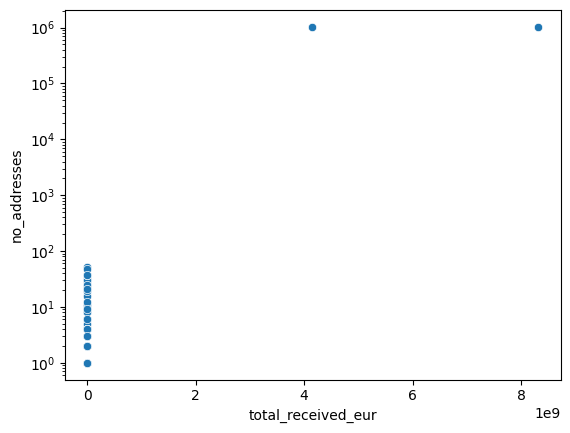

In [18]:
p = sns.scatterplot(data=respEntityDF, x="total_received_eur", y="no_addresses")
p.set(yscale="log")
plt.show(p)

We can assume that entities that received large funds and control a very large number of addresses are services (e.g., exchanges) or super-clusters. Therefore, for our further analysis, we filter our entities by **ignoring entities with more than 10K address**.

In [19]:
respEntityDFfiltered = respEntityDF[respEntityDF['no_addresses'] < 10e3]
respEntityDFfiltered

,_error,_info,_request_entity,actors,balance_eur,balance_usd,balance_value,best_address_tag_abuse,best_address_tag_actor,best_address_tag_address,...,root_address,token_balances,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value,total_tokens_received,total_tokens_spent
0,NaN,NaN,423390435,NaN,0.00,0.00,0,sextortion,NaN,1Fd5wVoG3at4Setv8QMsXjLhS56FEQ19eH,...,1Fd5wVoG3at4Setv8QMsXjLhS56FEQ19eH,NaN,349.32,398.92,6323561,349.32,398.92,6323561,NaN,NaN
1,NaN,NaN,480505216,NaN,0.00,0.00,0,sextortion,NaN,1QFNFoWpvmxLywMFcaHT3QmwvnKHpWWgyF,...,1QFNFoWpvmxLywMFcaHT3QmwvnKHpWWgyF,NaN,666.20,755.61,18891083,666.20,755.61,18891083,NaN,NaN
2,NaN,NaN,434423451,NaN,10.77,11.77,39366,sextortion,NaN,13DAd45ARMJW6th1cBuY1FwB9beVSzW77R,...,1DzM9y4fRgWqpZZCsvf5Rx4HupbE5Q5r4y,NaN,212858.48,244195.00,3759704089,211622.39,241681.41,3759664723,NaN,NaN
3,NaN,NaN,446281042,NaN,0.00,0.00,0,sextortion,NaN,1GGhxKFqxvgdB6Qnqx9xhY9ZkpwMJ6mkR1,...,1Mn8ASCFYVeLPQ8FthhEkpwkSoAxc4Mgq4,NaN,1356.30,1551.91,24034286,1200.76,1357.46,24034286,NaN,NaN
4,NaN,NaN,429576138,NaN,0.27,0.30,1000,sextortion,NaN,14dEvzyftZjrTjXaX5XXHo65C1rdsqCw1s,...,19fbsopNBC77qYTVaX6iqg3cWZAHhxD8WC,NaN,66921.50,78061.76,1199509374,66404.50,77372.27,1199508374,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,NaN,459416857,NaN,0.00,0.00,0,sextortion,NaN,1MbdGY1LVr6gEjyN3Rok5HQDQcjWbYmLds,...,1MbdGY1LVr6gEjyN3Rok5HQDQcjWbYmLds,NaN,2218.14,2517.37,70867328,2334.25,2655.57,70867328,NaN,NaN
91,NaN,NaN,449332788,NaN,0.00,0.00,0,sextortion,NaN,12Mr26cq6CnMFyG93ig6tNNR1wRDTpr1Jk,...,1EGMpZV7AnKKpNK9C1ziPMaQqNc9zVT4C,NaN,25797.67,29310.45,502220283,16432.64,18742.64,502220283,NaN,NaN
92,NaN,NaN,424687687,NaN,0.00,0.00,0,sextortion,NaN,18LhvTGJJueu2kQWVtoNFyoJwDS8S6Sqmo,...,18LhvTGJJueu2kQWVtoNFyoJwDS8S6Sqmo,NaN,605.50,701.56,10737599,605.50,701.56,10737599,NaN,NaN
93,NaN,NaN,458372245,NaN,0.00,0.00,0,sextortion,NaN,1A7nmeXMjFd8unyg9hopifwBRpWu5MpqQw,...,1A7nmeXMjFd8unyg9hopifwBRpWu5MpqQw,NaN,1404.87,1595.57,46024503,1341.22,1525.10,46024503,NaN,NaN


# Q4: How many USD did the corresponding entities receive in total?

In [20]:
print(f"{len(respEntityDFfiltered)} entities, which control {sum(respEntityDFfiltered['no_addresses'])} addresses, " +
      f"received {sum(respEntityDFfiltered['total_received_usd']):.2f} USD")

94 entities, which control 562 addresses, received 1515064.45 USD


# Q5: Where did the money come from, where did it go to?

For all filtered entities - we denote them as focus entities - we now gather all sending and receiving entities.

In [23]:
with graphsense.ApiClient(configuration) as clnt:
  blkapi = bulk_api.BulkApi(clnt)
  rcsv = blkapi.bulk_csv(
                           CURRENCY,
                           operation='list_entity_neighbors',
                           body={
                               'entity': respEntityDFfiltered['_request_entity'].to_list(),
                               'direction': 'in',
                               'include_labels': True
                               },
                               num_pages=2,
                               _preload_content=False\
                           )
  
  sendingEntitiesDF = pd.read_csv(rcsv)
sendingEntitiesDF

,_error,_info,_request_entity,entity_actors,entity_balance_eur,entity_balance_usd,entity_balance_value,entity_best_address_tag_abuse,entity_best_address_tag_actor,entity_best_address_tag_address,...,entity_total_spent_value,entity_total_tokens_received,entity_total_tokens_spent,labels,labels_count,no_txs,token_values,value_eur,value_usd,value_value
0,NaN,NaN,477682623,NaN,6377.76,6965.79,23302419,NaN,bitstamp,31jFw3a2YeBkkjtp4nhWacRjNnrjgmFviB,...,1167271856859588,NaN,NaN,"antpool,bitstamp,bitstamp.net",3,1,NaN,485.15,548.03,14999999
1,NaN,NaN,478282212,NaN,0.00,0.00,0,NaN,NaN,NaN,...,20619567,NaN,NaN,NaN,0,1,NaN,661.63,745.52,20612217
2,NaN,NaN,436368059,NaN,0.00,0.00,0,NaN,NaN,NaN,...,3050000,NaN,NaN,NaN,0,1,NaN,0.86,1.00,15210
3,NaN,NaN,423390435,NaN,0.00,0.00,0,NaN,NaN,NaN,...,69166817,NaN,NaN,NaN,0,1,NaN,349.32,398.92,6323561
4,NaN,NaN,446281042,NaN,0.00,0.00,0,sextortion,NaN,1AjgBp2S3GuD9pyySTZWgqsBpixDNosbDU,...,184635175,NaN,NaN,sextortion spam,1,1,NaN,645.25,735.13,11526447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,NaN,NaN,449332788,NaN,0.00,0.00,0,NaN,NaN,NaN,...,4334808,NaN,NaN,NaN,0,1,NaN,165.27,188.76,4240000
2649,NaN,NaN,449332788,NaN,0.00,0.00,0,NaN,NaN,NaN,...,97757964,NaN,NaN,NaN,0,1,NaN,428.08,488.92,10982253
2650,NaN,NaN,449332788,NaN,0.00,0.00,0,NaN,NaN,NaN,...,127082684,NaN,NaN,NaN,0,1,NaN,774.78,880.38,23295821
2651,NaN,NaN,449332788,NaN,0.00,0.00,0,NaN,NaN,NaN,...,14656644,NaN,NaN,NaN,0,1,NaN,491.59,556.87,14575000


Our foucus entities also transfer funds among themselves. We remove them because we are interested in (known) other parties.

In [24]:
sendingEntitiesDF_filtered = sendingEntitiesDF[~sendingEntitiesDF['entity_entity'] \
    .isin(sendingEntitiesDF['_request_entity'])] \
    .loc[:, ['_request_entity', 'entity_entity', 'entity_best_address_tag_label']] \
    .rename(columns={'_request_entity': 'src_entity',
                     'entity_entity': 'dst_entity',
                     'entity_best_address_tag_label':'label'}) \
    .dropna()
sendingEntitiesDF_filtered

,src_entity,dst_entity,label
0,477682623,59774322,bitstamp
8,467333820,4635850,coinbase.com
30,457139754,45964491,huobi
31,457139754,59774322,bitstamp
44,421412157,72009786,cryptopay.me
...,...,...,...
2608,449332788,4635850,coinbase.com
2609,449332788,36951179,utrust
2610,449332788,45964491,huobi
2611,449332788,59774322,bitstamp


In [25]:
print(f"Our focus entities received funds from {len(sendingEntitiesDF_filtered)} other known entities")

Our focus entities received funds from 193 other known entities


The above entities primarily represent custodial wallets hosted by major cryptoasset exchanges. They were most likely used to transfer by extortion victims to transfer funds to the perpetrators. Let's proceed and investigate the outgoing side.

In [26]:
with graphsense.ApiClient(configuration) as clnt:
  blkapi = bulk_api.BulkApi(clnt)
  rcsv = blkapi.bulk_csv(
                        CURRENCY,
                        operation="list_entity_neighbors",
                        body={
                          'entity': respEntityDFfiltered['entity'].to_list(),
                          'direction': 'out',
                          'include_labels': True
                          },
                          num_pages=2,
                          _preload_content=False
                        )
  receivingEntitiesDF = pd.read_csv(rcsv)
receivingEntitiesDF

,_error,_info,_request_entity,entity_actors,entity_balance_eur,entity_balance_usd,entity_balance_value,entity_best_address_tag_abuse,entity_best_address_tag_actor,entity_best_address_tag_address,...,entity_total_spent_value,entity_total_tokens_received,entity_total_tokens_spent,labels,labels_count,no_txs,token_values,value_eur,value_usd,value_value
0,NaN,NaN,460098857,NaN,0.00,0.00,0,NaN,NaN,NaN,...,157716216,NaN,NaN,NaN,0,1,NaN,5525.71,6307.04,157716216
1,NaN,NaN,468708086,NaN,0.00,0.00,0,NaN,NaN,NaN,...,105716916,NaN,NaN,NaN,0,1,NaN,3338.78,3806.88,105716916
2,NaN,NaN,446593186,NaN,0.00,0.00,0,NaN,NaN,NaN,...,27088582,NaN,NaN,NaN,0,1,NaN,1529.79,1722.70,27088582
3,NaN,NaN,464369779,NaN,0.00,0.00,0,NaN,NaN,NaN,...,219379948,NaN,NaN,NaN,0,1,NaN,7842.95,8943.31,219379948
4,NaN,NaN,468264186,NaN,0.00,0.00,0,NaN,NaN,NaN,...,50487831,NaN,NaN,NaN,0,1,NaN,1726.37,1960.29,50487831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,NaN,NaN,455996709,NaN,0.00,0.00,0,NaN,NaN,NaN,...,5005787,NaN,NaN,NaN,0,1,NaN,158.82,180.20,5005787
368,NaN,NaN,455996709,NaN,0.00,0.00,0,NaN,NaN,NaN,...,60611930,NaN,NaN,NaN,0,1,NaN,793.61,904.24,26488000
369,NaN,NaN,455996709,NaN,0.00,0.00,0,NaN,NaN,NaN,...,68167411,NaN,NaN,NaN,0,1,NaN,815.89,923.99,23068000
370,NaN,NaN,455996709,NaN,0.15,0.16,547,NaN,NaN,NaN,...,622229846,NaN,NaN,NaN,0,1,NaN,1692.94,2041.52,3559359


In [27]:
receivingEntitiesDF_filtered = receivingEntitiesDF[~receivingEntitiesDF['entity_entity'] \
    .isin(receivingEntitiesDF['_request_entity'])] \
    .drop_duplicates()
receivingEntitiesDF_filtered

,_error,_info,_request_entity,entity_actors,entity_balance_eur,entity_balance_usd,entity_balance_value,entity_best_address_tag_abuse,entity_best_address_tag_actor,entity_best_address_tag_address,...,entity_total_spent_value,entity_total_tokens_received,entity_total_tokens_spent,labels,labels_count,no_txs,token_values,value_eur,value_usd,value_value
0,NaN,NaN,460098857,NaN,0.00,0.00,0,NaN,NaN,NaN,...,157716216,NaN,NaN,NaN,0,1,NaN,5525.71,6307.04,157716216
1,NaN,NaN,468708086,NaN,0.00,0.00,0,NaN,NaN,NaN,...,105716916,NaN,NaN,NaN,0,1,NaN,3338.78,3806.88,105716916
2,NaN,NaN,446593186,NaN,0.00,0.00,0,NaN,NaN,NaN,...,27088582,NaN,NaN,NaN,0,1,NaN,1529.79,1722.70,27088582
3,NaN,NaN,464369779,NaN,0.00,0.00,0,NaN,NaN,NaN,...,219379948,NaN,NaN,NaN,0,1,NaN,7842.95,8943.31,219379948
4,NaN,NaN,468264186,NaN,0.00,0.00,0,NaN,NaN,NaN,...,50487831,NaN,NaN,NaN,0,1,NaN,1726.37,1960.29,50487831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,NaN,NaN,455996709,NaN,0.00,0.00,0,NaN,NaN,NaN,...,5005787,NaN,NaN,NaN,0,1,NaN,158.82,180.20,5005787
368,NaN,NaN,455996709,NaN,0.00,0.00,0,NaN,NaN,NaN,...,60611930,NaN,NaN,NaN,0,1,NaN,793.61,904.24,26488000
369,NaN,NaN,455996709,NaN,0.00,0.00,0,NaN,NaN,NaN,...,68167411,NaN,NaN,NaN,0,1,NaN,815.89,923.99,23068000
370,NaN,NaN,455996709,NaN,0.15,0.16,547,NaN,NaN,NaN,...,622229846,NaN,NaN,NaN,0,1,NaN,1692.94,2041.52,3559359


The entities listed above received funds from the perpetrator and are most likely part of a money laundering scheme.

In [28]:
known_receivingEntitiesDF = receivingEntitiesDF_filtered[['entity_entity', '_request_entity', 'entity_best_address_tag_label']] \
    .rename(columns={'_request_entity': 'dst_entity',
                     'entity_entity': 'src_entity',
                     'entity_best_address_tag_label':'label'}) \
    .dropna()

known_receivingEntitiesDF

,src_entity,dst_entity,label
6,366385635,455253353,okex.com
59,424153801,478282212,coinpayments.net
61,447402797,463565677,binance
67,447402797,480505216,binance
173,274076081,430623047,binance
185,56408267,462308836,cryptonator.com
233,274076081,429118733,binance
257,274076081,440390219,binance
281,274076081,420026147,binance


We find several direct connections between payment addresses controlled by the perpetrator and cryptoasset exchanges.

But we should continue this investigation over several hops, which is something we will do in a later exercise.

## Network Visualization

Finally, we build and visualize a network showing the entities we just identified and collected.

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

### Exchanges sending money to sextortion addresses

In [30]:
g = nx.DiGraph()
for i, row in sendingEntitiesDF_filtered.iterrows(): 
    g.add_edge(row['src_entity'], row['dst_entity'])
    g.add_node(row['src_entity'], label=row['label'])
    g.add_node(row['dst_entity'], label='sextortion')

In [31]:
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")

Number of nodes: 101
Number of edges: 193


In [32]:
node_colours = []

for node_id, values in list(g.nodes(data=True)):
    if(values['label'] == 'sextortion'):
        node_colours.append('red')
    else:
        node_colours.append('lightgreen')

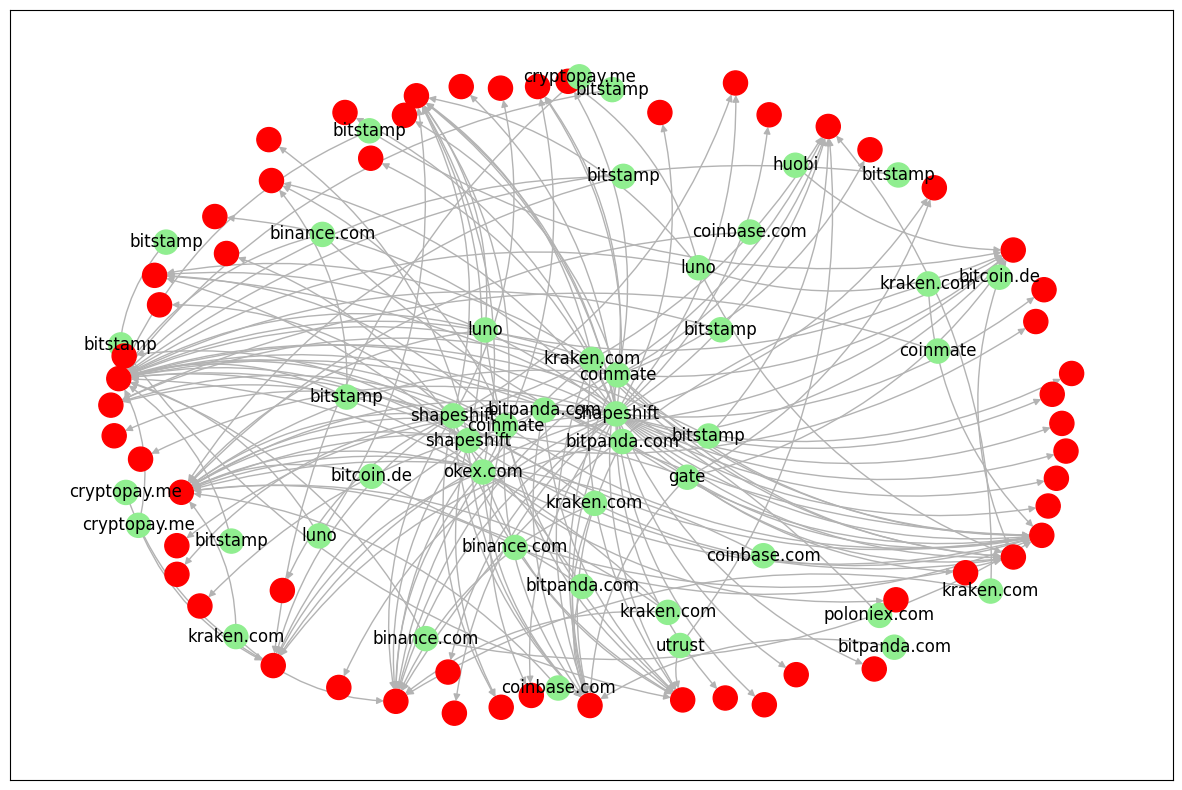

In [33]:
import math

pos = nx.spring_layout(g, k=10/math.sqrt(g.order()))

plt.figure(1, figsize=(15,10))

nx.draw_networkx_nodes(g, pos, node_color=node_colours)
node_labels = nx.get_node_attributes(g, 'label')
node_labels = {n:"" if lab == 'sextortion' else lab for n,lab in node_labels.items()} 


nx.draw_networkx_labels(g, pos, labels=node_labels)
nx.draw_networkx_edges(g, pos, connectionstyle="arc3,rad=0.2", edge_color=(0.7,0.7,0.7))
plt.show()


### Exchanges receiving money from sextortion addresses

In [34]:
g = nx.DiGraph()
for i, row in known_receivingEntitiesDF.iterrows():
    g.add_edge(row['src_entity'], row['dst_entity'])
    g.add_node(row['dst_entity'], label=row['label'])
    g.add_node(row['src_entity'], label='sextortion')

In [35]:
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")

Number of nodes: 14
Number of edges: 9


In [36]:
node_colours = []

for node_id, values in list(g.nodes(data=True)):
    if(values['label'] == 'sextortion'):
        node_colours.append('red')
    else:
        node_colours.append('lightgreen')

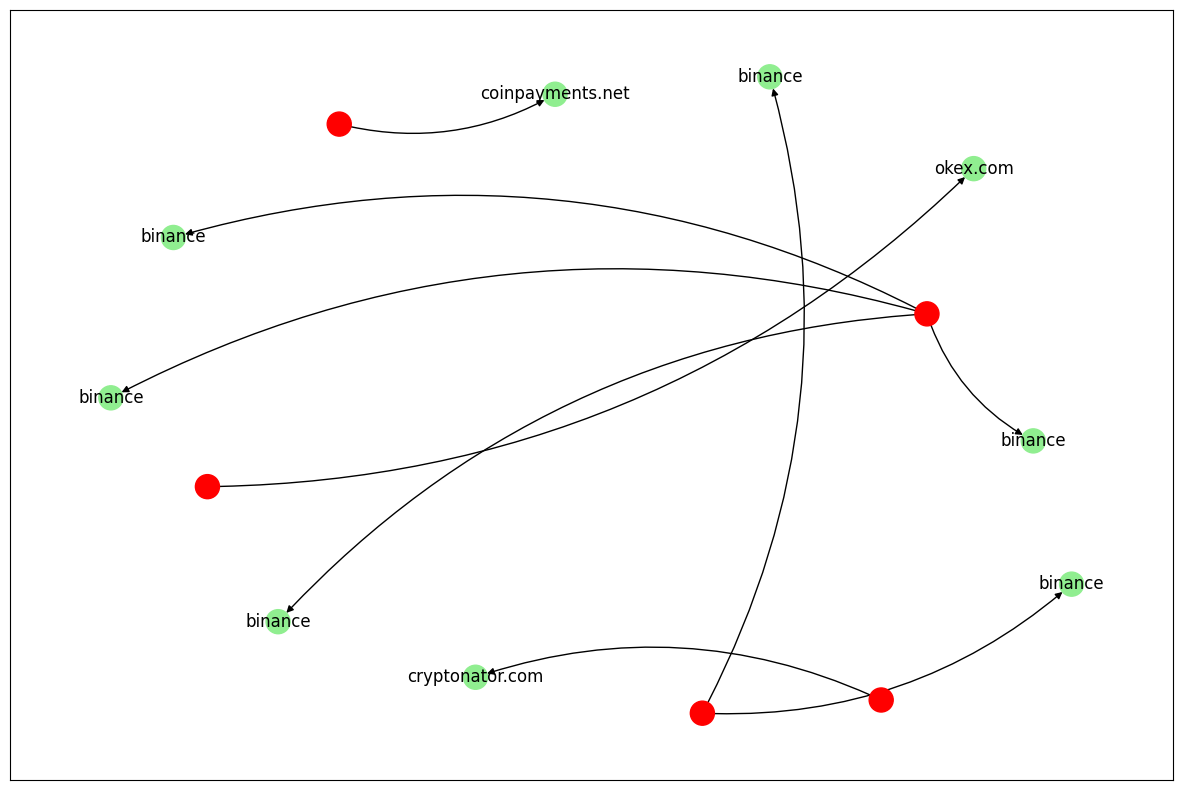

In [37]:
import math

pos = nx.spring_layout(g, k=10/math.sqrt(g.order()))

plt.figure(1, figsize=(15,10))

nx.draw_networkx_nodes(g, pos, node_color=node_colours)
node_labels = nx.get_node_attributes(g, 'label')
node_labels = {n:"" if lab == 'sextortion' else lab for n,lab in node_labels.items()} 
nx.draw_networkx_labels(g, pos, labels=node_labels)
nx.draw_networkx_edges(g, pos, connectionstyle="arc3,rad=0.2")
plt.show()